# This notebook contains some initial EEMD plots of WT03 and WT04

In [63]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os,os.path
ROOT_PATH = os.path.abspath("..").split("data_processing")[0]
module_paths = []
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/data_processing/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/hybrid_analysis_process_functions/")))
module_paths.append(os.path.abspath(os.path.join(ROOT_PATH+"/utils/")))
for module_path in module_paths:
    if module_path not in sys.path:
        print("appended")
        sys.path.append(module_path)
%autoreload
from scipy import stats
import glob # To count files in folder
import functions as f
import wt_data, ff_transform, explore_fft_time_data, envelope, build_dataset, load_raw_signals, envelope, envelope_emd,plotting_methods
import resample_signals, filter_signals, plotting_methods,filters,correlation_coeff, feature_extraction,polycoherence,clustering

import hilbert

ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src


In [ ]:
_, times, op_data_intervals, _ = load_raw_signals.load_raw('gearbox','wt04')

# Printing just the IMFs and the kurtosis value

In [51]:
from pathlib import Path
from scipy.stats import kurtosis, skew

def plot_imfs_and_kurtosis(path_folder,SAVE_FILE_NAME,times,input_file_type,input_signal_origin='filtered_6000',number_to_print=2):
    # import all IMFs:
    fs=25600

    highcut_lp = 2000

    file_count = len(glob.glob1(path_folder,"*.csv"))
    print("file count:", file_count)


    for i in range(file_count):
        if input_file_type == 'csv':
            path=path_folder + f'interval_number_{i}.csv'
            df = pd.read_csv(path, header=None)
        if input_file_type == 'zip':
            path=path_folder + f'raw_wt04_interval_number_{i}.zip'
            df = pd.read_csv(path,compression='zip')
        # s = df.to_numpy()


        fig, axs = plt.subplots(df.shape[0], figsize=(15, 25), facecolor='w', edgecolor='k')


        for j in range(df.shape[0]): # Looping through the IMFs
            kurt = kurtosis(df.iloc[j,:].to_numpy())
            kurt = round(kurt, 4)

            if j==0:
                axs[j].set_title(f"EEMD decomposition for WT 4\ninterval number {i}\n\nKurtosis: {kurt}")
                axs[j].plot(times[j][0:20000],df.iloc[j,:].to_numpy(),color='#F87060')
                if input_signal_origin =='filtered_signal':
                    axs[j].set_ylabel('Filtered signal')
                if input_signal_origin =='raw_signal':
                    axs[j].set_ylabel('Raw signal')

            else:
                axs[j].set_title(f"Kurtosis: {kurt}")
                axs[j].plot(times[j][0:20000],df.iloc[j,:].to_numpy())
                axs[j].set_ylabel(f'IMF{j}')

            #axs[j].set_xlabel('Seconds [s]')
            axs[j].margins(0)
            axs[j].grid(b=None)

        fig.text(0.5, -0.003, 'Time [s]', ha='center',fontsize=14) #global xlabel
        plt.tight_layout(pad=2)


        plt.savefig(f'../../plots/{SAVE_FILE_NAME}.png',dpi=200)
        plt.show()

        if i == number_to_print:
            break

#path_folder='/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/wt04/eemd_signals/'
#plot_imfs_and_kurtosis(path_folder,'eemd_wt04_interval_00',times,'csv')

# WT04: Get the max kurtosis value for all IMFs for each interval

In [ ]:
# Get the max kurtosis value for all IMFs for each interval

from pathlib import Path

# import all IMFs:
fs=25600
path_folder = '/Volumes/OsvikExtra/signal_data/raw_filtered_6000Hz/gearbox/wt04/eemd_signals/'
highcut_lp = 2000

file_count = len(glob.glob1(path_folder,"*.csv"))
print("file count:", file_count)

max_kurt_inteval = []
for i in range(file_count):
    path=path_folder + f'interval_number_{i}.csv'
    df = pd.read_csv(path, header=None)
    
    max_kurt = 0
    for j in range(df.shape[0]): # Looping through the IMFs
        if j > 5:
            # We just need the first 6 imfs. (higher frequency information)
            break
        kurt = kurtosis(df.iloc[j,:].to_numpy())
        kurt = round(kurt, 4)
        if kurt > max_kurt:
            max_kurt = kurt
            
    max_kurt_inteval.append(max_kurt) # Append the max kurt

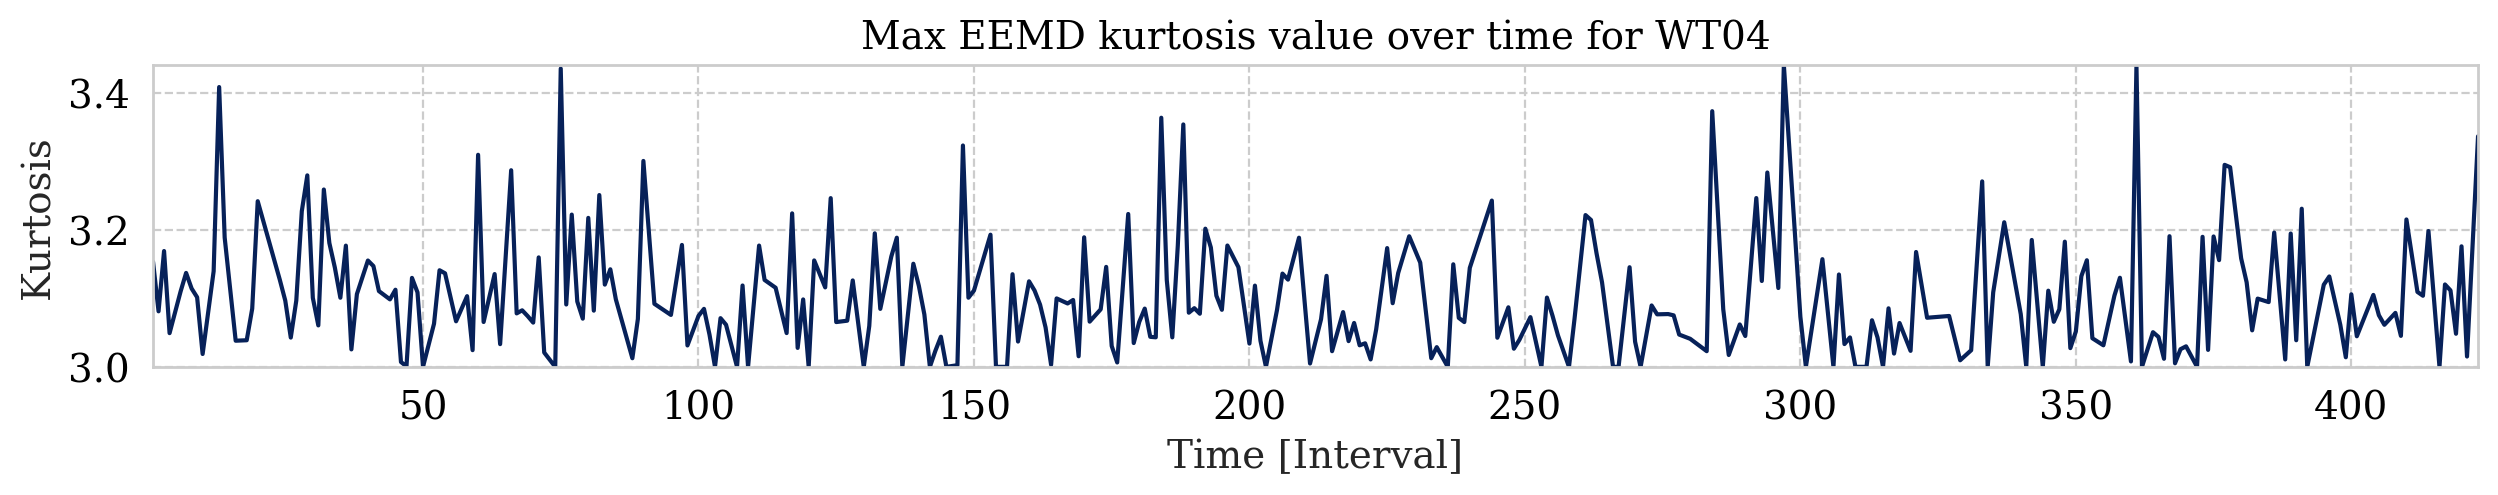

In [140]:
# [x for x in X if P(x)]
max_kurt_inteval_filt=[x+3 for x in max_kurt_inteval]
len(max_kurt_inteval_filt)
op_data_intervals_copy = op_data_intervals
op_data_intervals_copy['kurtosis']=max_kurt_inteval_filt
op_data_intervals_copy = op_data_intervals_copy[op_data_intervals_copy['AvgSpeed']>1400]
op_data_intervals_copy = op_data_intervals_copy[op_data_intervals_copy['kurtosis']<3.5]
op_data_intervals_copy['kurtosis'].plot(figsize=(15,2))
plt.title('Max EEMD kurtosis value over time for WT04')
plt.margins(0)
plt.xlabel("Time [Interval]")
plt.ylabel("Kurtosis")
plt.show()

# WT03

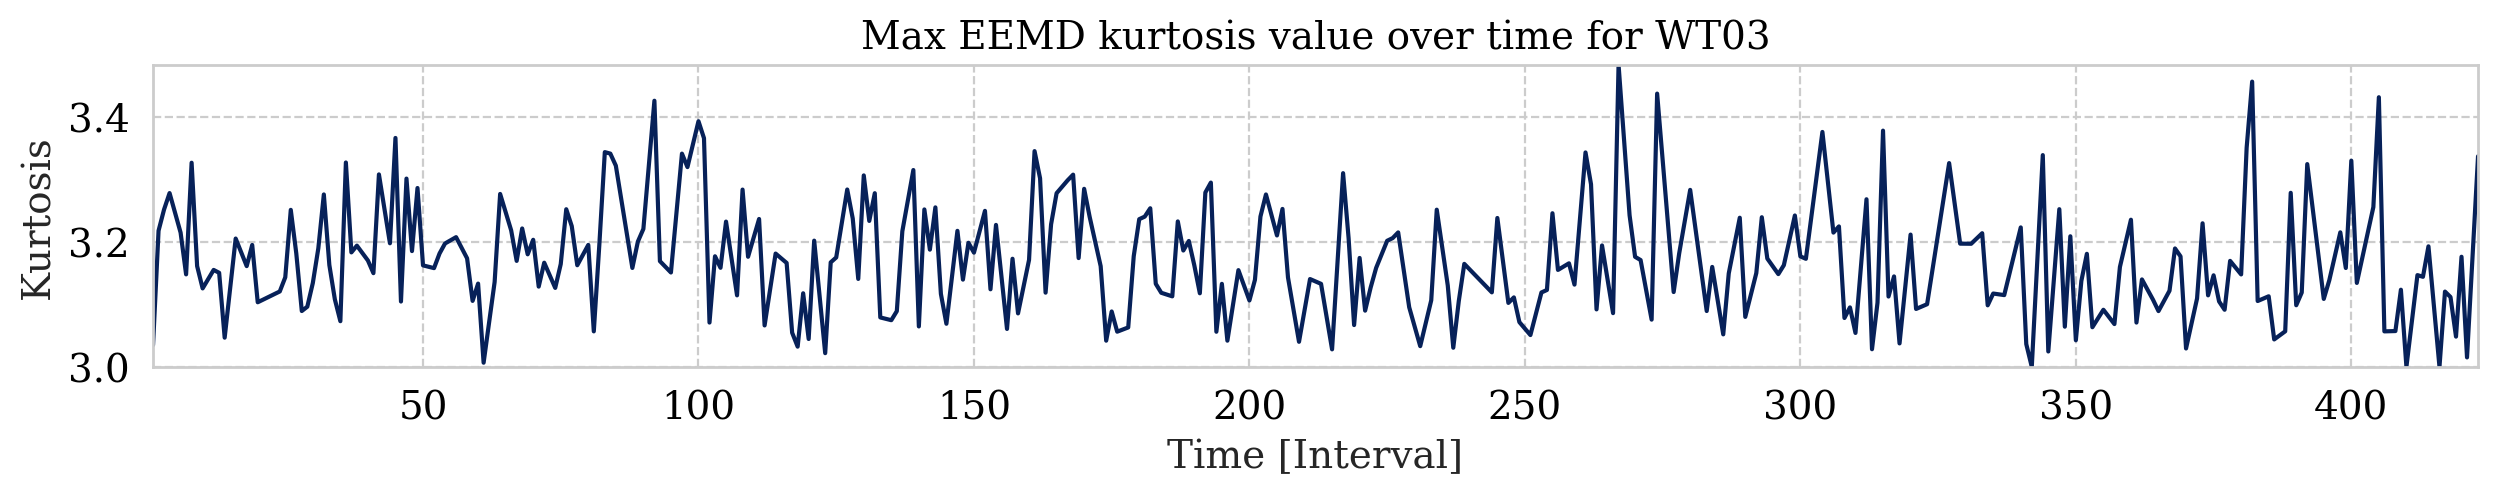

In [145]:
# [x for x in X if P(x)]
max_kurt_inteval_filt=[x+3 for x in max_kurt_inteval]
len(max_kurt_inteval_filt)
op_data_intervals_copy = op_data_intervals
op_data_intervals_copy['kurtosis']=max_kurt_inteval_filt
op_data_intervals_copy = op_data_intervals_copy[op_data_intervals_copy['AvgSpeed']>1400]
op_data_intervals_copy = op_data_intervals_copy[op_data_intervals_copy['kurtosis']<3.5]
op_data_intervals_copy['kurtosis'].plot(figsize=(15,2))
plt.title('Max EEMD kurtosis value over time for WT03')
plt.margins(0)
plt.xlabel("Time [Interval]")
plt.ylabel("Kurtosis")
plt.show()

## EEMD on the raw signal

file count: 424


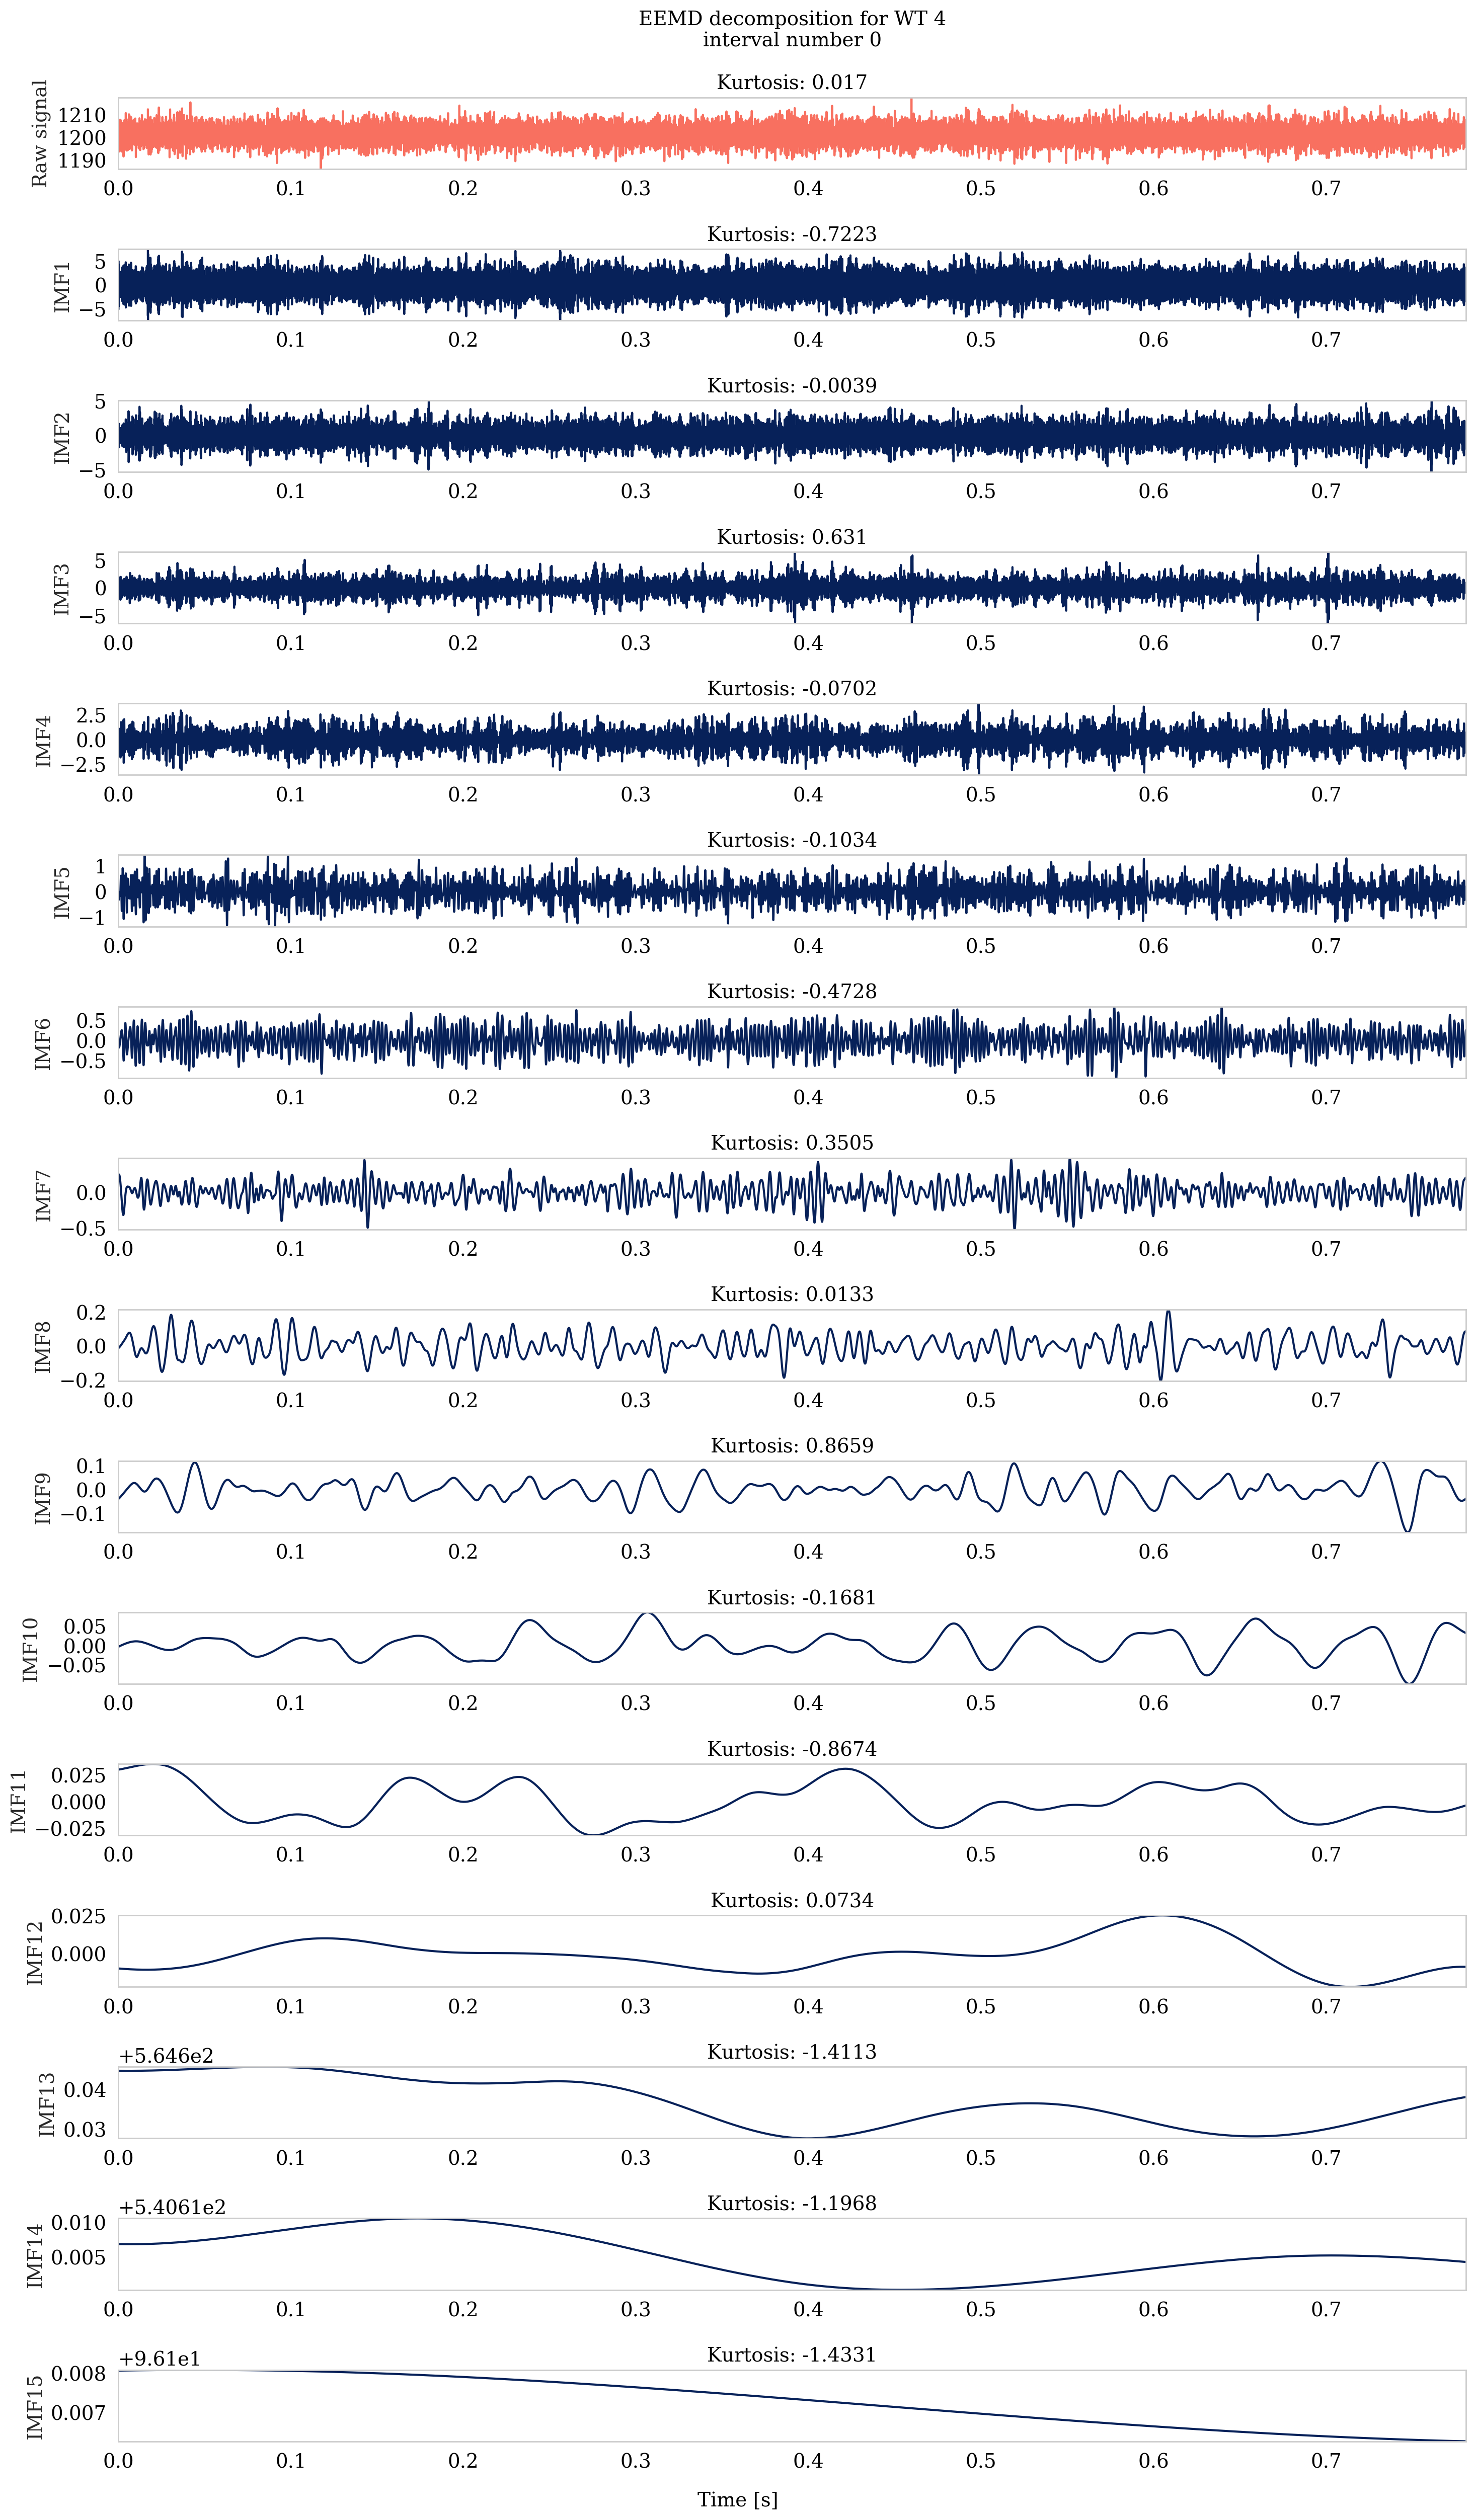

######## NEXT INTERVAL ########


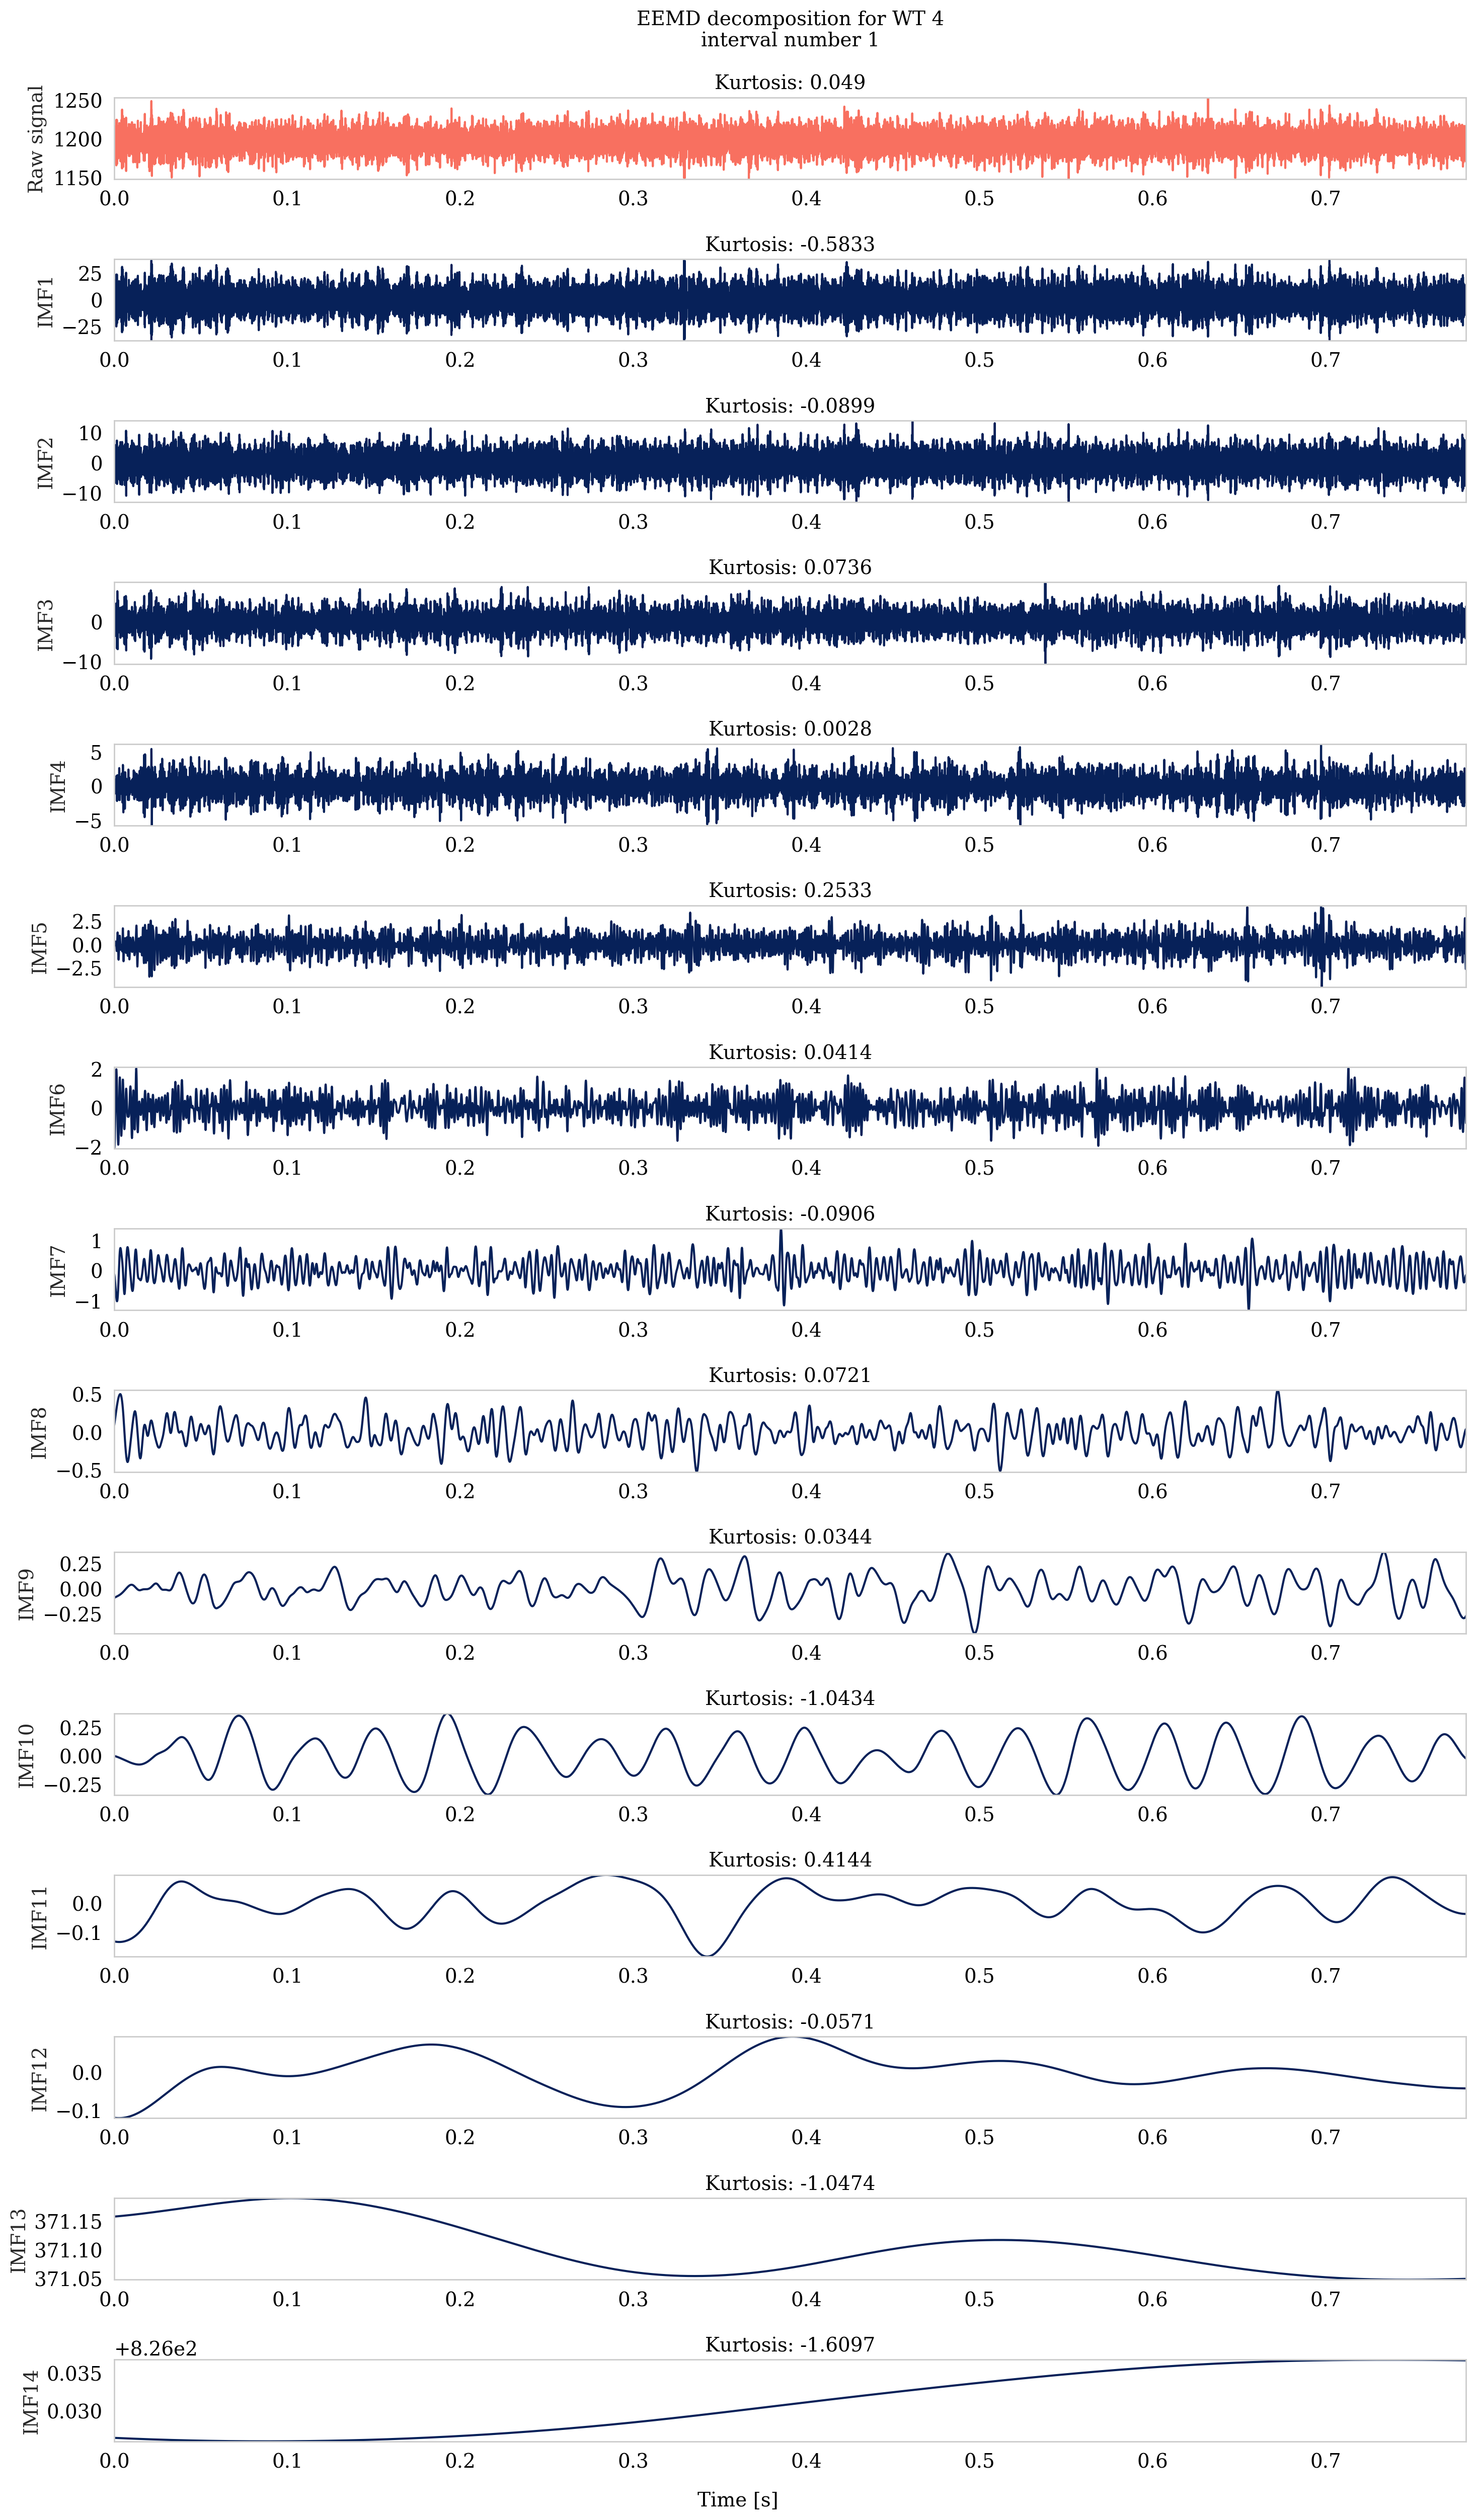

######## NEXT INTERVAL ########


In [52]:
raw_imfs_path='/Volumes/OsvikExtra/signal_data/raw_data/gearbox/wt04/eemds/'
plot_imfs_and_kurtosis(raw_imfs_path,'raw_eemd_wt04_interval_00',times,'zip','raw_signal')

The plots show that the decomposed signals have fairly low kurotsis values, not indicating any faults.